<a href="https://colab.research.google.com/github/Abhiroop17/Bird-Species-Identification-and-Classification/blob/main/Birds_Species_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os

# **Import and Unzip the folder**

In [5]:
!unzip "/content/archive (14).zip" -d "birds"

Archive:  /content/archive (14).zip
  inflating: birds/images to predict/1.jpg  
  inflating: birds/images to predict/2.jpg  
  inflating: birds/images to predict/3.jpg  
  inflating: birds/images to predict/4.jpg  
  inflating: birds/images to predict/5.jpg  
  inflating: birds/images to predict/6.jpg  
  inflating: birds/test/ABBOTTS BABBLER/1.jpg  
  inflating: birds/test/ABBOTTS BABBLER/2.jpg  
  inflating: birds/test/ABBOTTS BABBLER/3.jpg  
  inflating: birds/test/ABBOTTS BABBLER/4.jpg  
  inflating: birds/test/ABBOTTS BABBLER/5.jpg  
  inflating: birds/test/ABBOTTS BOOBY/1.jpg  
  inflating: birds/test/ABBOTTS BOOBY/2.jpg  
  inflating: birds/test/ABBOTTS BOOBY/3.jpg  
  inflating: birds/test/ABBOTTS BOOBY/4.jpg  
  inflating: birds/test/ABBOTTS BOOBY/5.jpg  
  inflating: birds/test/ABYSSINIAN GROUND HORNBILL/1.jpg  
  inflating: birds/test/ABYSSINIAN GROUND HORNBILL/2.jpg  
  inflating: birds/test/ABYSSINIAN GROUND HORNBILL/3.jpg  
  inflating: birds/test/ABYSSINIAN GROUND HORNB

#**Define paths to the training and validation data**

In [35]:
train_dir = '/content/birds/train'
val_dir = '/content/birds/valid'
test_dir = '/content/birds/test'

#**Image dimensions and batch size**

In [36]:
img_height, img_width = 150, 150
batch_size = 32

# **Image data generators for augmenting and scaling images**

In [37]:
# Create an instance of ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Replace with your model's input size
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical', # Use 'categorical' for multi-class classification
    shuffle=False             # Do not shuffle so predictions match the actual order
)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 100 images belonging to 20 classes.
Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


# **Define the CNN model**

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the model**

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Train the model**

In [41]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 207ms/step - accuracy: 0.0912 - loss: 2.9111 - val_accuracy: 0.2500 - val_loss: 2.4659
Epoch 2/15
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1875 - loss: 2.5411

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 2.5411 - val_accuracy: 0.7500 - val_loss: 1.6171
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - accuracy: 0.2321 - loss: 2.4035 - val_accuracy: 0.4167 - val_loss: 1.8034
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2812 - loss: 1.9559 - val_accuracy: 0.7500 - val_loss: 1.5575
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.3325 - loss: 2.0931 - val_accuracy: 0.5312 - val_loss: 1.5830
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 0.2812 - loss: 2.2391 - val_accuracy: 0.5000 - val_loss: 2.6799
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.3968 - loss: 1.9109 - val_accuracy: 0.6250 - val_loss: 1.2560
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 1.7308 - val_accuracy: 0.5000 - val_loss: 1.6248
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.4370 - loss: 1.7019 - val_accuracy:

# **Save the model**

In [42]:
model.save('bird_species_cnn_model.h5')

# **Load the saved model**

In [43]:
# (useful if you want to load it separately for predictions)
model = load_model('bird_species_cnn_model.h5')

# **Function to predict bird species for a new image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
The predicted bird species is: AFRICAN CROWNED CRANE


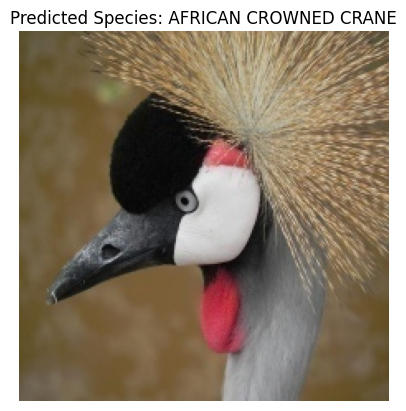

'AFRICAN CROWNED CRANE'

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_bird_species(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Scale image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_species = class_labels[predicted_class]

    print(f"The predicted bird species is: {predicted_species}")

    # Display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Predicted Species: {predicted_species}")
    plt.axis('off')  # Hide axes
    plt.show()

    return predicted_species
# Example usage
image_path = '/content/birds/images to predict/1.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted bird species is: AFRICAN PIED HORNBILL


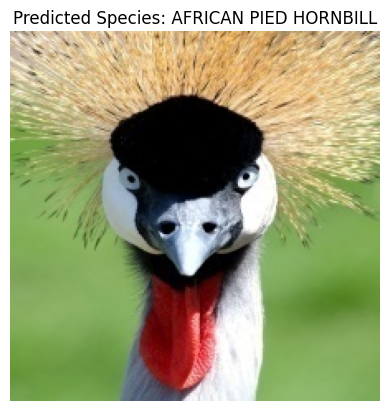

'AFRICAN PIED HORNBILL'

In [45]:
image_path = '/content/birds/images to predict/2.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted bird species is: AFRICAN CROWNED CRANE


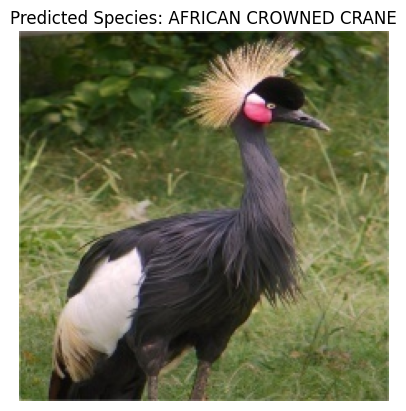

'AFRICAN CROWNED CRANE'

In [46]:
image_path = '/content/birds/images to predict/3.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted bird species is: AFRICAN CROWNED CRANE


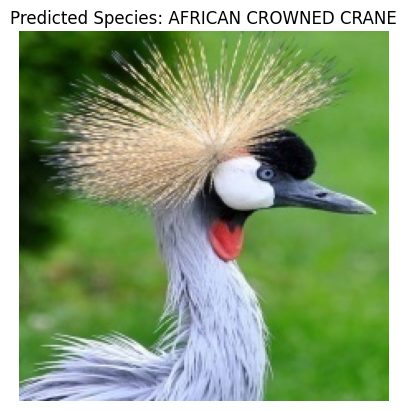

'AFRICAN CROWNED CRANE'

In [47]:
image_path = '/content/birds/images to predict/4.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted bird species is: ABYSSINIAN GROUND HORNBILL


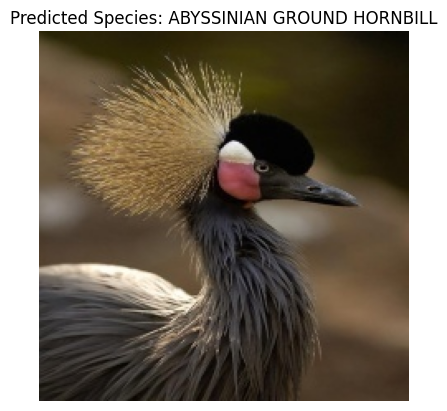

'ABYSSINIAN GROUND HORNBILL'

In [48]:
image_path = '/content/birds/images to predict/5.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted bird species is: ABBOTTS BOOBY


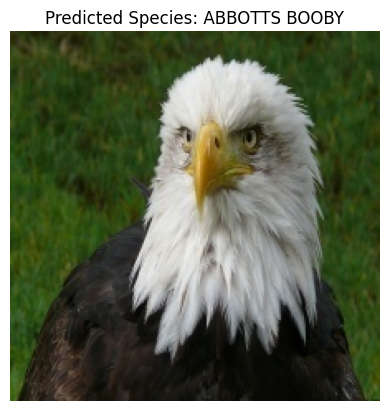

'ABBOTTS BOOBY'

In [49]:
image_path = '/content/birds/images to predict/6.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted bird species is: AMERICAN AVOCET


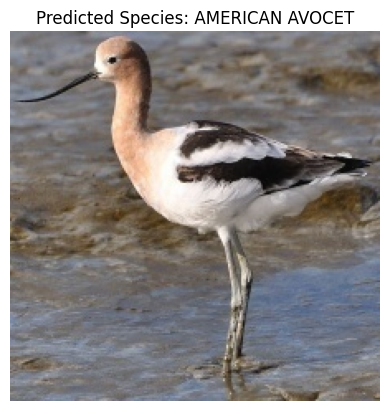

'AMERICAN AVOCET'

In [50]:
image_path = '/content/birds/test/AMERICAN AVOCET/1.jpg'
predict_bird_species(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted bird species is: ABBOTTS BOOBY


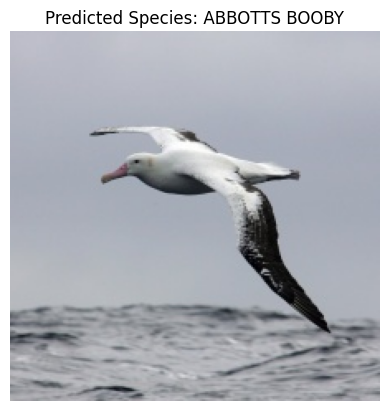

'ABBOTTS BOOBY'

In [51]:
image_path = '/content/birds/test/ALBATROSS/1.jpg'
predict_bird_species(image_path)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('bird_species_cnn_model.h5')

# Predict the classes for your test data
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = val_generator.classes  # Actual labels from the test generator

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Accuracy: 0.0400
Precision: 0.0575
Recall: 0.0400
F1 Score: 0.0454


In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

Confusion Matrix:
 [[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0]
 [0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 2 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0]
 [0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]]
Classification Report:
                             precision    recall  f1-score   support

           ABBOTTS BABBLER 

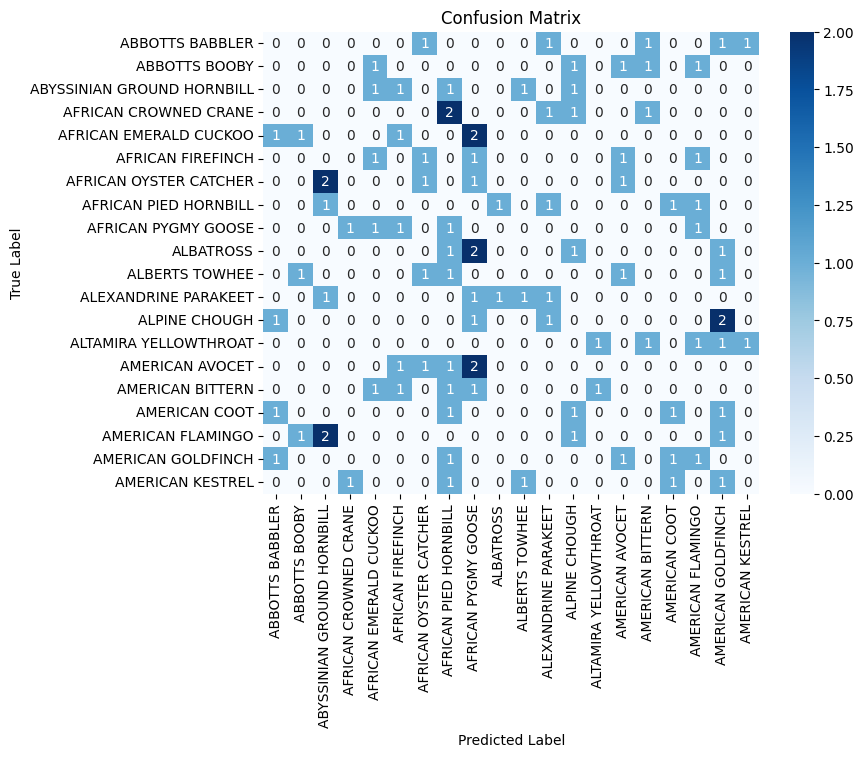

In [54]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()